In [1]:
import matplotlib.pyplot as plt
import numpy as np
N = 3
pos = np.zeros((N*N,2))
for i in range(0, N*N):
    ix = i//(N)
    iy = i%(N)
    pos[i] = [1/(N-1) * ix, iy *1/(N-1)]

In [2]:
triangle = np.zeros(((N-1)*(N-1)*2, 3))
for i in range(0, (N-1)*(N-1)*2):
    j = i//2
    jx = j//(N-1)
    jy = j%(N-1)
    k = jx + jy*N
    if i%2 == 1:
        triangle[i] = [k,k+N,k+N+1]
    else:
        triangle[i] = [k,k+1,k+N+1]
    

In [3]:
triangle

array([[0., 1., 4.],
       [0., 3., 4.],
       [3., 4., 7.],
       [3., 6., 7.],
       [1., 2., 5.],
       [1., 4., 5.],
       [4., 5., 8.],
       [4., 7., 8.]])

<Figure size 720x720 with 0 Axes>

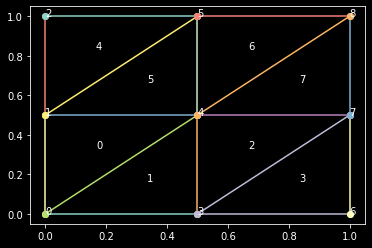

In [4]:
def draw(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],marker='o')
import matplotlib.pyplot as plt
x = np.linspace(0,1,N)
y= np.linspace(0,1,N)
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()

for i in range(0,N*N):
   ax.annotate(i, (pos[i][0], pos[i][1]))
for i in range(0,N):
    for j in range(1,N):
        draw(x[j-1],y[i],x[j],y[i])
        draw(x[i],y[j-1],x[i],y[j])
        if i >=1:
            draw(x[i-1],y[j-1],x[i],y[j])
#plot triangle
for i in range(0,(N-1)**2*2):
    x0,y0= pos[int(triangle[i,0])]
    x1,y1= pos[int(triangle[i,1])]
    x2,y2 = pos[int(triangle[i,2])]
    xmean = (x0 + x1 + x2)/3.0
    ymean= (y0 + y1 + y2)/3.0
    ax.annotate(i, (xmean,ymean))
plt.show()

In [5]:
def Assemble_Stiffness_Matrix(GMatrix,Ematrix, index):
    for i in range(0,3):
        for j in range(0,3):
            GMatrix[index[i]][index[j]] += Ematrix[i][j]


In [6]:
def det(x_val,y_val,x1,y1,x2,y2):
    return (x1-x_val)*(y2-y_val) - (x2-x_val)*(y1-y_val)

def Element_Stiffness_Matrix(x1,y1,x2,y2,x3,y3):
    A = np.array([[x1,y1,1],[x2,y2,1],[x3,y3,1] ])
    b1 = np.array([1,0,0])
    b2 = np.array([0,1,0]) 
    b3 = np.array([0,0,1])
    grad = np.zeros((3,2))
    [a,b,c] = np.linalg.solve(A,b1)
    grad[0] = [a,b]
    [a,b,c] = np.linalg.solve(A,b2)
    grad[1] = [a,b]
    [a,b,c] = np.linalg.solve(A,b3)
    grad[2] = [a,b]

    res = np.zeros((3,3))
    area_triangle = abs(det(x1,y1,x2,y2,x3,y3))/2
    for i in range(0,3):
        for j in range(0,3):
            res[i][j] = np.dot(grad[i],grad[j])
    return area_triangle * res

In [7]:
K = np.zeros(((N*N,N*N)))
for i in range(0,2*(N-1)**2):
    tam = triangle[i].astype(int) 
    x0,y0= pos[int(triangle[i,0])]
    x1,y1= pos[int(triangle[i,1])]
    x2,y2 = pos[int(triangle[i,2])]
    k = Element_Stiffness_Matrix(x0,y0,x1,y1,x2,y2)
    Assemble_Stiffness_Matrix(K,k,tam)
    

In [8]:
K

array([[ 1. , -0.5,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  2. , -0.5,  0. , -1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  2. , -1. ,  0. , -0.5,  0. ,  0. ],
       [ 0. , -1. ,  0. , -1. ,  4. , -1. ,  0. , -1. ,  0. ],
       [ 0. ,  0. , -0.5,  0. , -1. ,  2. ,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  1. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. , -0.5,  2. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. , -0.5,  1. ]])